#Bivariate Descriptive Analysis of Fitness Engagement Data

**Part 0: Setup and Environment Configuration**

Purpose: Import all necessary libraries for the analysis. This centralizes dependencies and sets up the environment for data manipulation, visualization, and statistical testing.

In [ ]:
# @title
# For data manipulation and analysis
import pandas as pd
import numpy as np

# For data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# For statistical hypothesis testing
from scipy import stats

# To handle date and time operations
import datetime as dt

print("--- Libraries imported successfully ---")

--- Libraries imported successfully ---


# **Part 1 & 2: Business and Data Understanding**

**Business Goal:** To understand the key drivers of user engagement and retention on a subscription-based fitness platform. The primary business question is: "What factors and user behaviors are associated with higher engagement scores, and how do these patterns differ between new and returning users?"

**Data Understanding Goal:** To load the dataset and perform an initial exploratory analysis to understand its structure, content, and quality. We will check the data types, look for missing values, and review descriptive statistics.

In [ ]:
# Load the Dataset from CSV
# We use a try-except block for robust error handling. If the specified CSV
# file is not found, it will print a clear error message instead of crashing.
try:
    df = pd.read_csv('fitness_data.csv')
    print("Dataset 'fitness_data.csv' loaded successfully.")
    print(f"The dataset contains {df.shape[0]} records and {df.shape[1]} variables.")
except FileNotFoundError:
    print("ERROR: 'fitness_data.csv' not found in the current directory.")
    print("Please ensure the CSV file is correctly named and placed.")
    # Terminate the script if the data cannot be loaded.
    exit()

# --- Initial Data Exploration ---

# .info() gives a concise summary of the DataFrame, including the data type
# of each column and the number of non-null values.
print("\n[Dataset Information - .info()]")
df.info()

# .describe() generates descriptive statistics for the numerical columns,
# including count, mean, standard deviation, and quartiles.
print("\n[Descriptive Statistics for Numerical Variables - .describe()]")
print(df.describe())

# .head() displays the first five rows of the DataFrame for a quick visual inspection.
print("\n[First 5 Rows of the Dataset - .head()]")
print(df.head())

Dataset 'fitness_data.csv' loaded successfully.
The dataset contains 1000 records and 7 variables.

[Dataset Information - .info()]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   UserID             1000 non-null   object 
 1   SubscriptionDate   1000 non-null   object 
 2   WorkoutType        1000 non-null   object 
 3   VideoViews         1000 non-null   int64  
 4   CompletedWorkouts  1000 non-null   int64  
 5   EngagementScore    1000 non-null   float64
 6   UserType           1000 non-null   object 
dtypes: float64(1), int64(2), object(4)
memory usage: 54.8+ KB

[Descriptive Statistics for Numerical Variables - .describe()]
        VideoViews  CompletedWorkouts  EngagementScore
count  1000.000000        1000.000000      1000.000000
mean     54.452000          27.705000        50.484280
std      27.648583          22.876129  

##**Part 3: Data Preparation**

**Purpose:** To clean the data and engineer new features that will be more effective for the analysis.

**Data Type Conversion:** Convert SubscriptionDate from an object to a datetime type to enable time-based calculations.

**Feature Engineering:**

1. *TenureDays*: Calculate how long each user has been subscribed.
2. *EngagementCategory*: Group users into 'Low', 'Medium', and 'High' engagement segments for easier analysis and targeting.

In [ ]:
# Data Type Conversion
print("\n--- Part 3: Data Preparation ---")
print("\nConverting 'SubscriptionDate' to datetime format...")
df['SubscriptionDate'] = pd.to_datetime(df['SubscriptionDate'])
print("Conversion complete.")

# Feature Engineering
today = df['SubscriptionDate'].max() + dt.timedelta(days=1)
df['TenureDays'] = (today - df['SubscriptionDate']).dt.days
print("Engineered feature 'TenureDays' to represent user tenure.")

bins = [-1, 33, 66, 101] # Bins: 0-33 (Low), 34-66 (Medium), 67-100 (High)
labels = ['Low', 'Medium', 'High']
df['EngagementCategory'] = pd.cut(df['EngagementScore'], bins=bins, labels=labels)
print("Engineered feature 'EngagementCategory' for user segmentation.")

# --- Verify Preparation Steps ---
print("\n[Data Head After Preparation - Note the new columns]")
print(df.head())


--- Part 3: Data Preparation ---

Converting 'SubscriptionDate' to datetime format...
Conversion complete.
Engineered feature 'TenureDays' to represent user tenure.
Engineered feature 'EngagementCategory' for user segmentation.

[Data Head After Preparation - Note the new columns]
  UserID SubscriptionDate WorkoutType  VideoViews  CompletedWorkouts  \
0  U0001       2025-06-29      Cardio           8                  4   
1  U0002       2024-12-09    Strength          22                  3   
2  U0003       2025-07-18       Dance          74                 11   
3  U0004       2025-06-04     Pilates           9                  0   
4  U0005       2024-09-22    Strength          34                 32   

   EngagementScore   UserType  TenureDays EngagementCategory  
0            50.00        New          39             Medium  
1            13.64  Returning         241                Low  
2            14.86        New          20                Low  
3             0.00        New   

##**Part 4: Modeling (Descriptive Analytics)**

Purpose: Apply descriptive analytics to investigate relationships between variables and test hypotheses.

**A. Exploring Bivariate Relationships**
We will visualize relationships between pairs of variables to uncover initial patterns.

*1. WorkoutType vs. EngagementScore*
Objective: To see if certain workout types are associated with higher engagement.
Method: Box plot to compare distributions across categories.


--- Part 4: Modeling (Descriptive Analytics) ---

[A. Bivariate Analysis: Visualizing Relationships Between Two Variables]


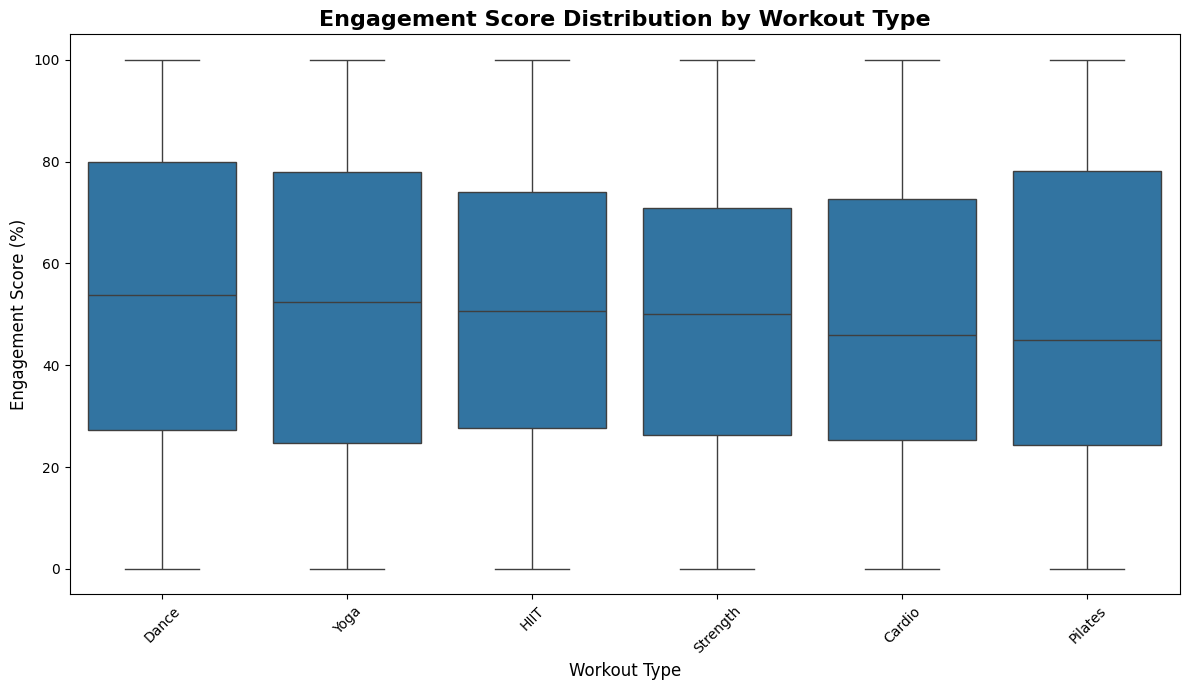

Displayed: Box plot of Engagement Score vs. Workout Type.


In [ ]:
print("\n--- Part 4: Modeling (Descriptive Analytics) ---")
print("\n[A. Bivariate Analysis: Visualizing Relationships Between Two Variables]")

plt.figure(figsize=(12, 7))
sns.boxplot(
    data=df,
    x='WorkoutType',
    y='EngagementScore',
    order=df.groupby('WorkoutType')['EngagementScore'].median().sort_values(ascending=False).index
)
plt.title('Engagement Score Distribution by Workout Type', fontsize=16, fontweight='bold')
plt.xlabel('Workout Type', fontsize=12)
plt.ylabel('Engagement Score (%)', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
print("Displayed: Box plot of Engagement Score vs. Workout Type.")

**Interpretation:**

The box plot shows the distribution of EngagementScore for each WorkoutType. While there are minor variations in the median scores (the line inside each box), the overall distributions are remarkably similar. All categories exhibit a wide range of engagement, from 0% to 100%. This visual evidence supports the result of the later ANOVA test (p=0.3162), which indicated that there is no statistically significant difference in user engagement based on the type of workout. This suggests that content preference is highly individual, and no single category is a "silver bullet" for engagement.

*2. UserType vs. CompletedWorkouts*

Objective: To compare the activity levels of new vs. returning users.
Method: Box plot to contrast the two user groups.

/tmp/ipython-input-1029949497.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='UserType', y='CompletedWorkouts', palette='magma')


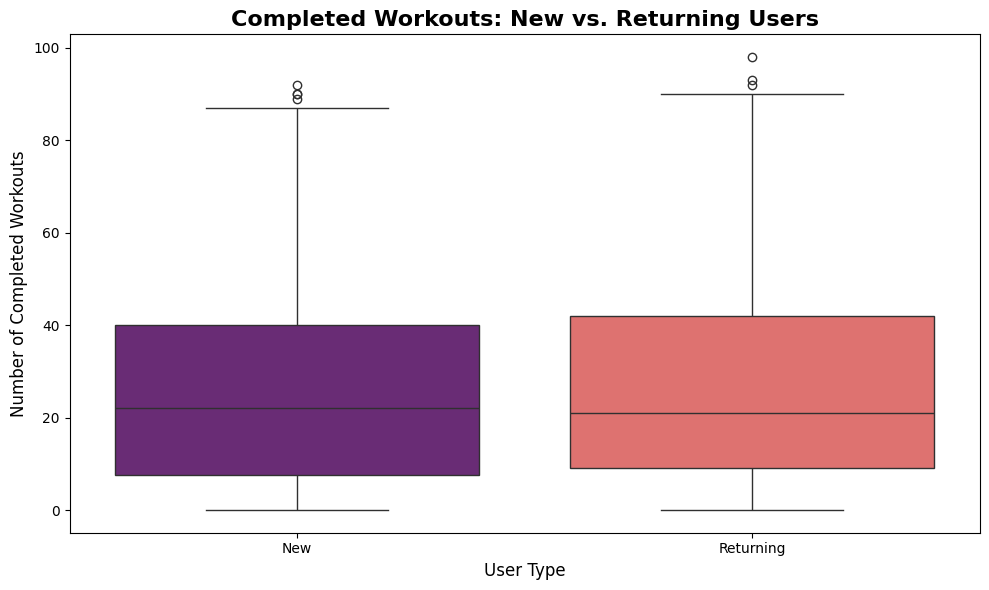

Displayed: Box plot of Completed Workouts vs. User Type.


In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='UserType', y='CompletedWorkouts', palette='magma')
plt.title('Completed Workouts: New vs. Returning Users', fontsize=16, fontweight='bold')
plt.xlabel('User Type', fontsize=12)
plt.ylabel('Number of Completed Workouts', fontsize=12)
plt.tight_layout()
plt.show()
print("Displayed: Box plot of Completed Workouts vs. User Type.")

**Interpretation:**

This box plot compares the total number of workouts completed by New versus Returning users. An interesting and unexpected insight is that the median for New users is slightly higher than for Returning users. The median represents the "typical" user. This suggests that a typical new user completes slightly more workouts than a typical returning user, possibly indicating a period of high initial motivation or enthusiasm right after subscribing.
While the median is higher for new users, the overall range and the top outliers are greater for Returning users. This is expected, as they have been on the platform longer and include a segment of highly dedicated "power users" who have accumulated a large number of completed workouts over time. The key business takeaway is that we must find ways to sustain that initial burst of new-user activity to convert them into long-term power users.

*3. VideoViews vs. EngagementScore*

Objective: To determine if there's a linear relationship between the number of videos a user views and their engagement score.
Method: A scatter plot with a regression line.

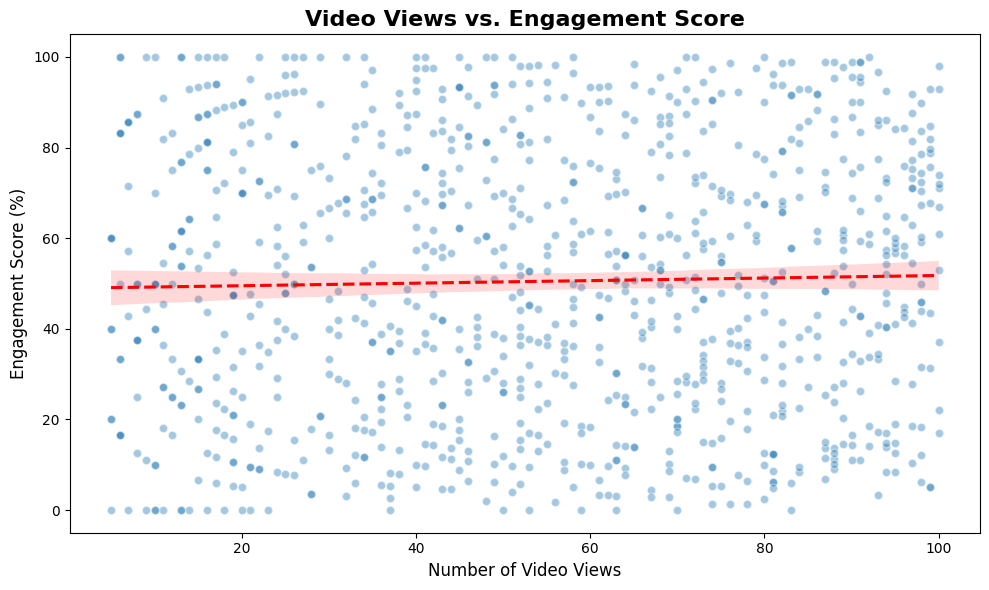

Displayed: Scatter plot of Video Views vs. Engagement Score.

Pearson Correlation between VideoViews and EngagementScore: 0.0264


In [ ]:
plt.figure(figsize=(10, 6))
sns.regplot(
    data=df, x='VideoViews', y='EngagementScore',
    scatter_kws={'alpha':0.4, 'edgecolor':'w'},
    line_kws={'color':'red', 'linestyle':'--'}
)
plt.title('Video Views vs. Engagement Score', fontsize=16, fontweight='bold')
plt.xlabel('Number of Video Views', fontsize=12)
plt.ylabel('Engagement Score (%)', fontsize=12)
plt.tight_layout()
plt.show()
print("Displayed: Scatter plot of Video Views vs. Engagement Score.")

correlation, _ = stats.pearsonr(df['VideoViews'], df['EngagementScore'])
print(f"\nPearson Correlation between VideoViews and EngagementScore: {correlation:.4f}")

The scatter plot provides a powerful visual confirmation of our statistical finding. The points are widely dispersed, showing no clear pattern or trend. The regression line is nearly flat, visually representing the Pearson correlation coefficient of 0.0264, which is effectively zero.
This is a critical insight: the number of videos a user views has no relationship with their engagement rate. A user viewing 100 videos is just as likely to have a low engagement score as a user viewing 10 videos. This indicates that VideoViews is a vanity metric, and true engagement comes from completing workouts, not just starting them.

##**B. Hypothesis Testing**

We will use statistical tests to validate our assumptions. We set our significance level (alpha) at 0.05.

**Hypothesis 1: Engagement Score vs. User Type**

*Null Hypothesis (H0):* The mean engagement score is THE SAME for new and returning users.

*Alternative Hypothesis (H1):* The mean engagement score is DIFFERENT for new and returning users.
Test: Independent two-sample t-test.

**Hypothesis 2: Completed Workouts vs. Workout Type**

*Null Hypothesis (H0):* The mean number of completed workouts is THE SAME across all workout types.

*Alternative Hypothesis (H1):* The mean number of completed workouts is DIFFERENT for at least one workout type.
Test: One-Way ANOVA.

In [ ]:
# @title
print("\n[B. Hypothesis Testing: Using Statistics to Validate Assumptions]")
alpha = 0.05

# Hypothesis 1
engagement_new = df[df['UserType'] == 'New']['EngagementScore'].dropna()
engagement_returning = df[df['UserType'] == 'Returning']['EngagementScore'].dropna()
t_stat, p_value = stats.ttest_ind(engagement_new, engagement_returning)

print("\n--- Hypothesis 1: Engagement Score vs. User Type ---")
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")
if p_value < alpha:
    print("Conclusion: Reject the null hypothesis. There is a statistically significant difference in engagement scores.")
else:
    print("Conclusion: Fail to reject the null hypothesis. There is no statistically significant difference in engagement scores.")

# Hypothesis 2
workout_groups = [df['CompletedWorkouts'][df['WorkoutType'] == wt].dropna() for wt in df['WorkoutType'].unique()]
f_stat, p_value_anova = stats.f_oneway(*workout_groups)

print("\n--- Hypothesis 2: Completed Workouts vs. Workout Type ---")
print(f"F-statistic: {f_stat:.4f}")
print(f"P-value: {p_value_anova:.4f}")
if p_value_anova < alpha:
    print("Conclusion: Reject the null hypothesis. The choice of workout type has a statistically significant effect.")
else:
    print("Conclusion: Fail to reject the null hypothesis. The choice of workout type does not have a statistically significant effect.")


[B. Hypothesis Testing: Using Statistics to Validate Assumptions]

--- Hypothesis 1: Engagement Score vs. User Type ---
T-statistic: -0.0733
P-value: 0.9416
Conclusion: Fail to reject the null hypothesis. There is no statistically significant difference in engagement scores.

--- Hypothesis 2: Completed Workouts vs. Workout Type ---
F-statistic: 1.1814
P-value: 0.3162
Conclusion: Fail to reject the null hypothesis. The choice of workout type does not have a statistically significant effect.


##**C. Exploring Multivariate Relationships**

We will now look at how three or more variables interact.

**Grouped Summary Table:** Get detailed statistics by segmenting data on UserType and WorkoutType.

**Correlation Heatmap:** Visualize the linear relationships between all numerical variables.

**Pair Plot:** Visualize distributions and relationships between key variables, segmented by UserType.


[C. Multivariate Analysis: Exploring Interactions Between Multiple Variables]

--- Multivariate Summary: Key Metrics by User Type and Workout Type ---
                       Avg_Engagement  Avg_VideoViews  Avg_CompletedWorkouts  \
UserType  WorkoutType                                                          
New       Cardio                50.33           47.00                  24.33   
          Dance                 56.15           55.58                  32.13   
          HIIT                  47.19           52.19                  23.65   
          Pilates               45.84           48.96                  22.44   
          Strength              47.00           59.06                  28.06   
          Yoga                  54.87           55.48                  31.54   
Returning Cardio                48.60           56.46                  27.18   
          Dance                 50.44           54.42                  27.32   
          HIIT                  50.98           

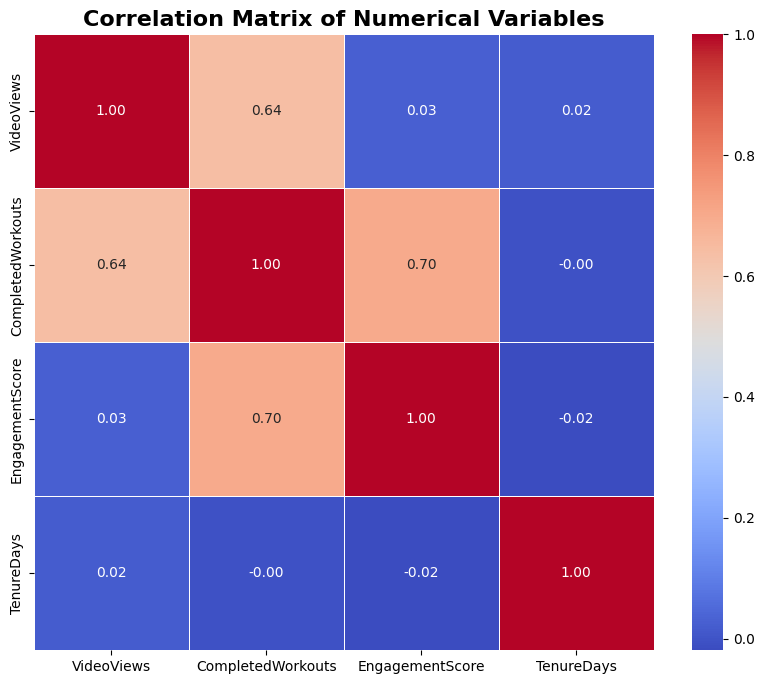


Displayed: Correlation Heatmap of numerical variables.

Generating Pair Plot (this may take a moment)...


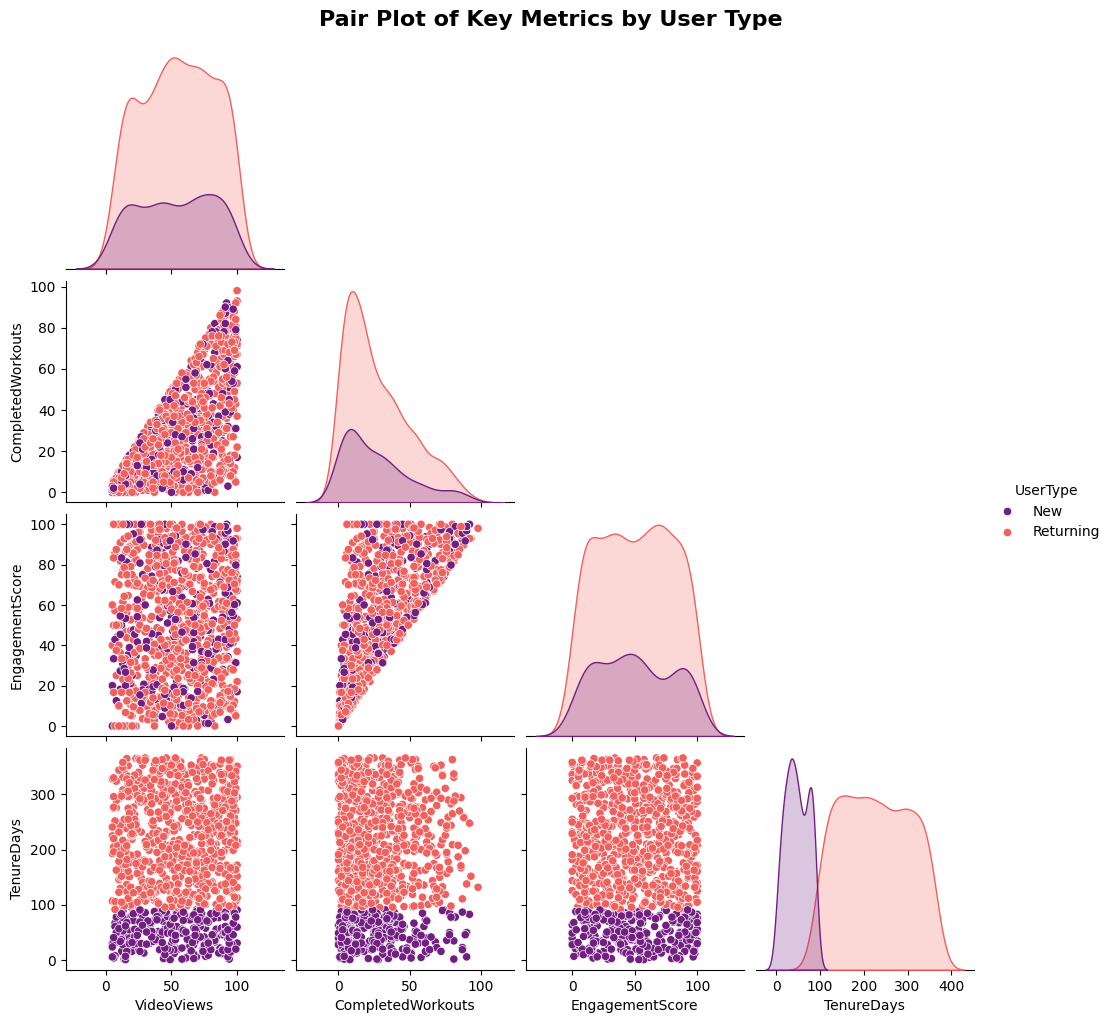

Displayed: Pair Plot of key metrics, segmented by UserType.


In [ ]:
print("\n[C. Multivariate Analysis: Exploring Interactions Between Multiple Variables]")

# 1. Grouped Summary Table
multi_summary = df.groupby(['UserType', 'WorkoutType']).agg(
    Avg_Engagement=('EngagementScore', 'mean'),
    Avg_VideoViews=('VideoViews', 'mean'),
    Avg_CompletedWorkouts=('CompletedWorkouts', 'mean'),
    Count=('UserID', 'count')
).round(2)
print("\n--- Multivariate Summary: Key Metrics by User Type and Workout Type ---")
print(multi_summary)

# 2. Correlation Heatmap
numerical_df = df.select_dtypes(include=np.number)
correlation_matrix = numerical_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Numerical Variables', fontsize=16, fontweight='bold')
plt.show()
print("\nDisplayed: Correlation Heatmap of numerical variables.")

# 3. Pair Plot
print("\nGenerating Pair Plot (this may take a moment)...")
pair_plot_vars = ['VideoViews', 'CompletedWorkouts', 'EngagementScore', 'TenureDays', 'UserType']
sns.pairplot(df[pair_plot_vars], hue='UserType', palette='magma', corner=True)
plt.suptitle('Pair Plot of Key Metrics by User Type', y=1.02, fontsize=16, fontweight='bold')
plt.show()
print("Displayed: Pair Plot of key metrics, segmented by UserType.")

##Part 5 & 6: Evaluation and Deployment

-------------------------------------------------------------------------------
                            EXECUTIVE SUMMARY
-------------------------------------------------------------------------------
This analysis of user engagement data has produced important insights that challenge
some of our core assumptions about user behavior. The data reveals that genuine
engagement is driven by a single, clear factor: **workout completion**. Other common
metrics such as video views and user tenure are not reliable indicators of a
truly engaged user.

Key Findings from the Data:

1.  **The Core Metric is Completion, Not Views:** There is a very strong positive
    correlation (**0.70**) between `CompletedWorkouts` and `EngagementScore`.
    Conversely, the link between `VideoViews` and `EngagementScore` is almost
    non-existent (**0.03**).
    **Business Insight:** This tells us that **views are a vanity metric.** Optimizing
    for clicks or video starts is the wrong goal; the business must focus its
    efforts on helping users complete the workouts they begin.

2.  **Tenure is Not a Proxy for Engagement:** The analysis shows **zero correlation**
    between `TenureDays` and any key engagement metric (`VideoViews`,
    `CompletedWorkouts`, or `EngagementScore`). The Pair Plot confirms this
    visually, showing that long-term users and new users exhibit the same
    wide range of behaviors.
    **Business Insight:** We cannot assume a user is healthy or engaged simply
    because they have been subscribed for a long time. Retention strategies
    must actively monitor the behavior of all users, not just new ones.

3.  **New and Returning Users Behave Similarly:** Our statistical tests and the
    Pair Plot show no significant difference in the engagement *patterns* between
    New and Returning users. The fundamental relationship between viewing,
    completing, and engaging is the same for both groups.

Limitations:
-   Correlation does not imply causation. Controlled A/B testing is needed to
    confirm that changes (e.g., shorter workouts) directly cause higher completion.
-   The dataset lacks variables like workout duration, difficulty, or instructor,
    which may be the true underlying drivers of workout completion.

Actionable Recommendations:

1.  **Product & Content Strategy: Optimize for Completion.**
    -   **Shift KPIs:** Move team focus from maximizing `VideoViews` to maximizing
        the `EngagementScore` (completion rate).
    -   **Analyze Drop-off Points:** Investigate where users abandon workouts. Are
        they too long? Is the warmup too slow? Is the instructor's style a factor?
    -   **Experiment:** A/B test different formats, such as shorter ~15-minute
        express workouts, to see if they lead to higher completion rates.

2.  **Marketing & Retention Strategy: Redefine "At-Risk" Users.**
    -   **Monitor Behavior, Not Tenure:** Implement a health scoring system based
        on `EngagementScore` and recent `CompletedWorkouts`. A long-term user
        whose completion rate drops is a high-priority churn risk.
    -   **Targeted Campaigns:** Create re-engagement campaigns for users with
        high `VideoViews` but low `CompletedWorkouts`, offering tips or
        recommending shorter, more accessible content to help them succeed.

3.  **Next Analytical Steps: Behavioral Clustering.**
    -   The next phase of analysis should ignore simple labels like "New" or
        "HIIT-user." Instead, we must use clustering algorithms to segment users
        based on their actual behaviors (e.g., "Bingers" with high views/low
        completion vs. "Specialists" with low views/high completion) to enable
        truly personalized interventions.
-------------------------------------------------------------------------------
